In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
yt_df = pd.read_csv("USvideosv.csv")
yt_df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37632,EqeIRzY7hIU,18.29.05,6 Cheese Gadgets put to the Test!,CrazyRussianHacker,28,2018-05-20T18:58:15.000Z,"Cheese Gadgets|""Gadgets""|""Cheese""|""kitchen gad...",1481067,26412,1538,2833,https://i.ytimg.com/vi/EqeIRzY7hIU/default.jpg,False,False,False,$1000 Survival Kit in a Case - https://youtu.b...
17477,wcy08U4FC-Y,18.11.02,Northwestern University Trombone Choir perform...,Christopher Davis,22,2018-02-07T18:01:29.000Z,[none],71151,763,51,101,https://i.ytimg.com/vi/wcy08U4FC-Y/default.jpg,False,False,False,The Northwestern University Trombone Choir per...
19567,fFjkYIgmZnA,18.21.02,New Cartoon - The Bagheads - Full Episode - Fr...,Cartoon Hangover,1,2018-02-13T20:00:02.000Z,"Cartoon Hangover|""Cartoon""|""CartoonHangover""|""...",66369,2520,588,564,https://i.ytimg.com/vi/fFjkYIgmZnA/default.jpg,False,False,False,Join us for the 8th full episode of GO! Cartoo...
21494,9yDNAc8YS9c,18.03.03,Stephen Fry Announcement,samfryltd,24,2018-02-23T11:24:08.000Z,[none],1712777,48745,1566,8891,https://i.ytimg.com/vi/9yDNAc8YS9c/default.jpg,False,False,False,NaN
31375,_zCDvOsdL9Q,18.28.04,INTERROGATING ZUCKERBERG — A Bad Lip Reading,Bad Lip Reading,23,2018-04-24T16:04:41.000Z,"mark zuckerberg|""facebook""|""hearing""|""congress...",4467989,226861,2751,10047,https://i.ytimg.com/vi/_zCDvOsdL9Q/default.jpg,False,False,False,Tension mounted during Mark Zuckerberg's congr...


In [3]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
# Dropping columns that we don't need
yt_df = yt_df.drop("video_id", axis=1)
yt_df = yt_df.drop("trending_date", axis=1)
yt_df = yt_df.drop("title", axis=1)
yt_df = yt_df.drop("channel_title", axis=1)
yt_df = yt_df.drop("category_id", axis=1)
yt_df = yt_df.drop("publish_time", axis=1)
yt_df = yt_df.drop("tags", axis=1)
yt_df = yt_df.drop("thumbnail_link", axis=1)
yt_df = yt_df.drop("description", axis=1)
yt_df = yt_df.drop("comments_disabled", axis=1)
yt_df = yt_df.drop("ratings_disabled", axis=1)
yt_df = yt_df.drop("video_error_or_removed", axis=1)

yt_df

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


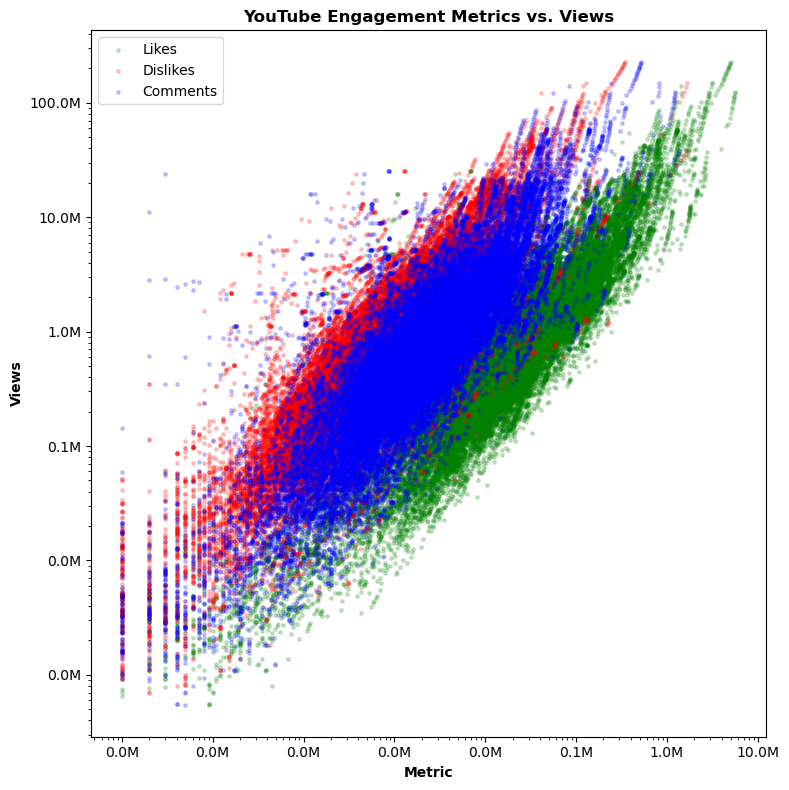

In [7]:
# Set up our figure
yt_scatter_fig, yt_scatter_ax = plt.subplots(figsize=(8, 8))

# Add Likes scatter
yt_scatter_ax.scatter(yt_df["likes"], yt_df["views"], color="green", s=6, alpha=0.2, label="Likes")
yt_scatter_ax.set_title("YouTube Engagement Metrics vs. Views", weight="bold")

# Add Dislikes scatter
yt_scatter_ax.scatter(yt_df["dislikes"], yt_df["views"], color="red", s=6, alpha=0.2, label="Dislikes")

# Add Comment Count scatter
yt_scatter_ax.scatter(yt_df["comment_count"], yt_df["views"], color="blue", s=6, alpha=0.2, label="Comments")

# Scaling for viewability
yt_scatter_ax.set_xlabel("Metric", weight="bold")
yt_scatter_ax.set_ylabel("Views", weight="bold")
yt_scatter_ax.set_xscale("log")
yt_scatter_ax.set_yscale("log")

# Turn units into readable form
from matplotlib.ticker import FuncFormatter
yt_scatter_ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
yt_scatter_ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Finish up
plt.tight_layout()
plt.legend()
plt.show()